In [286]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [287]:
df = pd.read_csv('data/train_.csv')
df.columns

Index(['header_details', 'address', 'latitude', 'longitude', 'user_name',
       'user_url', 'tel_number', 'price_dollars', 'Тип предложения', 'Серия',
       'Дом', 'Этаж', 'Площадь', 'Отопление', 'Состояние', 'Санузел', 'Газ',
       'Входная дверь', 'Парковка', 'Высота потолков', 'Разное',
       'Правоустанавливающие документы', 'views', 'hearts', 'publicated',
       'upped', 'pictures', 'Телефон', 'Интернет', 'Балкон', 'Мебель', 'Пол',
       'Безопасность', 'Возможность обмена', 'Возможность рассрочки',
       'Возможность ипотеки', 'num_of_comments', 'Площадь участка',
       'Канализация', 'Питьевая вода', 'Электричество'],
      dtype='object')

In [288]:
df_test = pd.read_csv('data/test.csv')

## Data preprocessing

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   header_details                  3364 non-null   object 
 1   address                         3367 non-null   object 
 2   latitude                        3364 non-null   float64
 3   longitude                       3364 non-null   float64
 4   user_name                       3367 non-null   object 
 5   user_url                        3367 non-null   object 
 6   tel_number                      3364 non-null   object 
 7   price_dollars                   3367 non-null   float64
 8   Тип предложения                 3364 non-null   object 
 9   Серия                           3364 non-null   object 
 10  Дом                             3364 non-null   object 
 11  Этаж                            3361 non-null   object 
 12  Площадь                         33

In [290]:
df.shape

(3367, 41)

In [291]:
df_test.shape

(998, 40)

In [292]:
# Удаляем столбцы которые имеют малого влияния на код
df.drop(columns=['Канализация', 'Питьевая вода', 'Электричество'], inplace=True)
df.drop(columns=['views', 'hearts', 'user_name', 'user_url', 'tel_number', 'views', 'hearts', 'publicated', 'pictures', 'num_of_comments'], inplace=True)

df_test.drop(columns=['Канализация', 'Питьевая вода', 'Электричество', 'views', 'hearts', 'user_name', 'user_url', 'tel_number', 'views', 'hearts', 'publicated', 'pictures', 'num_of_comments'], inplace=True)

df.shape

(3367, 30)

In [293]:
# Выделеляю количество комнат
df.dropna(subset=['header_details'], inplace=True)
df['Комнаты'] = df['header_details'].str.extract(r'(\d)-комн\. кв\.')
df['Комнаты'].fillna(6, inplace=True)
df['Комнаты'] = df['Комнаты'].astype(int)
df.drop(columns=['header_details'], inplace=True)

df_test['Комнаты'] = df_test['header_details'].str.extract(r'(\d)-комн\. кв\.')
df_test['Комнаты'].fillna(6, inplace=True)
df_test['Комнаты'] = df_test['Комнаты'].astype(int)
df_test.drop(columns=['header_details'], inplace=True)


In [294]:
df.dtypes[df.dtypes != 'object']

latitude         float64
longitude        float64
price_dollars    float64
Комнаты            int32
dtype: object

In [295]:
df.drop(columns=['latitude'], inplace=True)
df.drop(columns=['longitude'], inplace=True)

df_test.drop(columns=['latitude', 'longitude'], inplace=True)   

In [296]:
df

,address,price_dollars,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,...,Интернет,Балкон,Мебель,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты
0,"Бишкек, Магистраль, Байтик Баатыра/Южная магис...",67000.0,от агента,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,...,NaN,NaN,пустая,ламинат,NaN,NaN,NaN,NaN,NaN,2
1,"Бишкек, Политех, Чынгыз Айтматова/Ахунбаева",54000.0,от агента,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,...,проводной,балкон,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,"Бишкек, Джал-29 м-н",122000.0,от агента,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,...,проводной,балкон,полностью меблирована,паркет,"домофон, ...",обмен не предлагать,нет,нет,NaN,3
3,"Бишкек, Магистраль, Куттубаева/Южная Магистраль",92000.0,от собственника,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,...,NaN,NaN,полностью меблирована,ламинат,"охрана, ...",NaN,NaN,NaN,NaN,2
4,"Бишкек, Средний Джал м-н, мкр Джал-23 18/2",69000.0,от агента,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,...,NaN,лоджия,частично меблирована,ламинат,домофон,NaN,нет,нет,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,"с. Кара-Ой, ул.Рыскулова / Коенкозова",36000.0,от собственника,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3363,"Бишкек, 7 м-н, 7-й микрорайон, 50а стр 1",223000.0,от агента,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,есть,NaN,3
3364,с. Алга,43000.0,от агента,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3365,"Бишкек, Горького - Алма-Атинская, Горького-7-а...",39000.0,от агента,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,нет,NaN,1


In [297]:
df_test

,address,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,...,Интернет,Балкон,Мебель,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты
0,"Бишкек, Чуй - Алматинка, Шабдан Баатыра 125/1",от агента,элитка,монолитный,6 этаж из 9,87 м2,центральное,под самоотделку (псо),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,"Бишкек, Западный автовокзал, Динары Асановой 4",от агента,элитка,"монолитный, 2021 г.",9 этаж из 9,36 м2,центральное,евроремонт,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,"Бишкек, Ден Сяопина - Фучика, Фучика 38/2/Рыск...",от агента,элитка,"кирпичный, 2022 г.",7 этаж из 9,33 м2,на газе,евроремонт,NaN,NaN,...,NaN,NaN,частично меблирована,NaN,NaN,NaN,NaN,NaN,NaN,1
3,"Бишкек, VEFA, Радищева и Карасаева 126/Карасаа...",от собственника,элитка,монолитный,7 этаж из 9,"48 м2, жилая: 48 м2, кухня: 16 м2",смешанное,евроремонт,совмещенный,автономный,...,проводной,нет,частично меблирована,ламинат,"домофон, ...",NaN,NaN,NaN,NaN,1
4,"Бишкек, Магистраль, Сухе Батора/Южная Магистраль",от агента,элитка,"монолитный, 2024 г.",3 этаж из 12,82 м2,на газе,под самоотделку (псо),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,"Бишкек, Золотой квадрат, Орозбекова 26/Чокморова",от агента,элитка,"кирпичный, 2009 г.",5 этаж из 9,229 м2,центральное,хорошее,2 с/у и более,магистральный,...,проводной,нет,полностью меблирована,дерево,"охрана, ...",NaN,NaN,NaN,NaN,5
994,"Бишкек, Магистраль, ул. Токомбаева/Куттубаева...",от агента,элитка,"кирпичный, 2024 г.",2 этаж из 10,84 м2,на газе,под самоотделку (псо),2 с/у и более,магистральный,...,NaN,NaN,пустая,NaN,NaN,обмен не предлагать,нет,нет,NaN,2
995,"Бишкек, Магистраль, Арстанбека Дуйшеева, 12",от агента,индивид. планировка,"монолитный, 2021 г.",4 этаж из 16,"105 м2, жилая: 56.65 м2",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,есть,NaN,3
996,"Бишкек, VEFA, Элебаева/Геологический",от агента,индивид. планировка,"кирпичный, 1968 г.",4 этаж из 4,"55.1 м2, жилая: 43 м2, кухня: 5.7 м2",центральное,евроремонт,совмещенный,магистральный,...,NaN,балкон,частично меблирована,ламинат,домофон,NaN,NaN,NaN,NaN,3


In [298]:
# Делю город и адресс недвижимости тренировочная выборка
city = []
ad = []
for address in df['address']:
    parts = address.split(', ', 1)
    if len(parts) == 1:
        parts.append('Nan')
    city.append(parts[0])
    ad.append(parts[1])

df['местность'] = city
df['адресс'] = ad 
df.drop(columns=['address'], inplace=True)
adres = []
for a in df['адресс']:
    parts = a.split(', ', 1)
    adres.append(parts[0])
df['адресс'] = adres

# Делю город и адресс недвижимости тестовая выборка
city_test = []
ad_test = []
for address in df_test['address']:
    parts = address.split(', ', 1)
    if len(parts) == 1:
        parts.append('Nan')
    city_test.append(parts[0])
    ad_test.append(parts[1])

df_test['местность'] = city_test
df_test['адресс'] = ad_test
df_test.drop(columns=['address'], inplace=True)
adres_test = []
for a in df_test['адресс']:
    parts = a.split(', ', 1)
    adres_test.append(parts[0])
    
df_test['адресс'] = adres_test

Преобразованиа категориальных данных в числовые с помощью Target encoding

In [299]:
result = df.groupby('адресс')['price_dollars'].mean()
df['ср_стоим_адресс'] = df['адресс'].map(result)
df = pd.get_dummies(df, columns=['Тип предложения'])

df_test['ср_стоим_адресс'] = df_test['адресс'].map(result)
df_test = pd.get_dummies(df_test, columns=['Тип предложения'])

In [300]:
print(df['Серия'].unique())
result_ser = df.groupby('Серия')['price_dollars'].mean() 
df['ср_стоим_серия'] = df['Серия'].map(result_ser)
result_dom = df.groupby('Дом')['price_dollars'].mean() 
df['ср_стоим_Дом'] = df['Дом'].map(result_dom)
df.drop(columns=['Серия', 'Дом'], inplace=True)

df_test['ср_стоим_серия'] = df_test['Серия'].map(result_ser)
df_test['ср_стоим_Дом'] = df_test['Дом'].map(result_dom)
df_test.drop(columns=['Серия', 'Дом'], inplace=True)
df

['элитка' 'сталинка' 'индивид. планировка' '106 серия'
 '106 серия улучшенная' 'малосемейка' 'хрущевка' '105 серия' '104 серия'
 'пентхаус' '108 серия' '107 серия' '104 серия улучшенная'
 '105 серия улучшенная' '102 серия']


,price_dollars,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,...,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом
0,67000.0,6 этаж из 14,47 м2,автономное,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,NaN,NaN,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014
1,54000.0,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,NaN,NaN,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879
2,122000.0,8 этаж из 10,110 м2,центральное,хорошее,раздельный,магистральный,бронированная,паркинг,NaN,...,нет,NaN,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879
3,92000.0,3 этаж из 12,68 м2,на газе,евроремонт,NaN,NaN,NaN,NaN,3 м.,...,NaN,NaN,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367
4,69000.0,13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,магистральный,бронированная,паркинг,3 м.,...,нет,NaN,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661
3363,223000.0,15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,NaN,NaN,NaN,3.6 м.,...,есть,NaN,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859
3364,43000.0,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879
3365,39000.0,4 этаж из 16,27 м2,на газе,евроремонт,NaN,NaN,NaN,NaN,NaN,...,нет,NaN,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661


In [301]:
df_test

,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,Разное,...,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом
0,6 этаж из 9,87 м2,центральное,под самоотделку (псо),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,Бишкек,Чуй - Алматинка,61609.090909,True,False,116193.784869,112105.293173
1,9 этаж из 9,36 м2,центральное,евроремонт,NaN,NaN,NaN,NaN,3 м.,NaN,...,NaN,NaN,1,Бишкек,Западный автовокзал,57666.666667,True,False,116193.784869,120283.640351
2,7 этаж из 9,33 м2,на газе,евроремонт,NaN,NaN,NaN,NaN,2.8 м.,"пластиковые окна, ...",...,NaN,NaN,1,Бишкек,Ден Сяопина - Фучика,59926.761905,True,False,116193.784869,114867.309859
3,7 этаж из 9,"48 м2, жилая: 48 м2, кухня: 16 м2",смешанное,евроремонт,совмещенный,автономный,бронированная,паркинг,3 м.,"новая сантехника, ...",...,NaN,NaN,1,Бишкек,VEFA,100802.222222,False,True,116193.784869,112105.293173
4,3 этаж из 12,82 м2,на газе,под самоотделку (псо),NaN,NaN,NaN,NaN,3.1 м.,NaN,...,NaN,NaN,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,82539.718367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,5 этаж из 9,229 м2,центральное,хорошее,2 с/у и более,магистральный,бронированная,паркинг,3 м.,"неугловая, ...",...,NaN,NaN,5,Бишкек,Золотой квадрат,291961.886792,True,False,116193.784869,188936.000000
994,2 этаж из 10,84 м2,на газе,под самоотделку (псо),2 с/у и более,магистральный,бронированная,паркинг,NaN,пластиковые окна,...,нет,NaN,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,83670.041322
995,4 этаж из 16,"105 м2, жилая: 56.65 м2",NaN,NaN,NaN,NaN,NaN,NaN,3.2 м.,NaN,...,есть,NaN,3,Бишкек,Магистраль,126094.258982,True,False,100190.818653,120283.640351
996,4 этаж из 4,"55.1 м2, жилая: 43 м2, кухня: 5.7 м2",центральное,евроремонт,совмещенный,магистральный,бронированная,NaN,2.7 м.,"пластиковые окна, ...",...,NaN,NaN,3,Бишкек,VEFA,100802.222222,True,False,100190.818653,59000.000000


In [302]:
# Выделяю на каком этаже находится квартира
def extract_floor_info(text):
    if pd.isna(text): 
        return None
    try:
        floor, total_floors = map(int, text.split(' этаж из '))
        return floor, total_floors
    except ValueError:
        return None  

df[['Этажи', 'Всего этажей']] = df['Этаж'].apply(lambda x: pd.Series(extract_floor_info(x)))

df['Этажи/Всего этажей'] = round(df['Этажи'] / df['Всего этажей'], 2)
df['Этажи/Всего этажей'].fillna(df['Этажи/Всего этажей'].median(), inplace=True)
df.drop(columns=['Этажи', 'Всего этажей'], inplace=True)
df['Этажи/Всего этажей'].fillna(df['Этажи/Всего этажей'].median(), inplace=True)
df['Площадь (м^2)'] = df['Площадь'].str.extract(r'(\d+)').astype(int)
df.drop(columns=['Площадь', 'Этаж'])

df_test[['Этажи', 'Всего этажей']] = df_test['Этаж'].apply(lambda x: pd.Series(extract_floor_info(x)))
df_test['Этажи/Всего этажей'] = round(df_test['Этажи'] / df_test['Всего этажей'], 2)
df_test['Этажи/Всего этажей'].fillna(df_test['Этажи/Всего этажей'].median(), inplace=True)
df_test.drop(columns=['Этажи', 'Всего этажей'], inplace=True)
df_test['Площадь (м^2)'] = df_test['Площадь'].str.extract(r'(\d+)').astype(int)
df_test.drop(columns=['Площадь', 'Этаж'])

,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,Разное,Правоустанавливающие документы,upped,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,центральное,под самоотделку (псо),NaN,NaN,NaN,NaN,NaN,NaN,"договор долевого участия, ...",Поднято 7 часов назад,...,2,Бишкек,Чуй - Алматинка,61609.090909,True,False,116193.784869,112105.293173,0.67,87
1,центральное,евроремонт,NaN,NaN,NaN,NaN,3 м.,NaN,NaN,Поднято 4 часа назад,...,1,Бишкек,Западный автовокзал,57666.666667,True,False,116193.784869,120283.640351,1.00,36
2,на газе,евроремонт,NaN,NaN,NaN,NaN,2.8 м.,"пластиковые окна, ...",договор долевого участия,Поднято 5 часов назад,...,1,Бишкек,Ден Сяопина - Фучика,59926.761905,True,False,116193.784869,114867.309859,0.78,33
3,смешанное,евроремонт,совмещенный,автономный,бронированная,паркинг,3 м.,"новая сантехника, ...","договор долевого участия, ...",NaN,...,1,Бишкек,VEFA,100802.222222,False,True,116193.784869,112105.293173,0.78,48
4,на газе,под самоотделку (псо),NaN,NaN,NaN,NaN,3.1 м.,NaN,NaN,Поднято 7 часов назад,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,82539.718367,0.25,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,центральное,хорошее,2 с/у и более,магистральный,бронированная,паркинг,3 м.,"неугловая, ...",технический паспорт,Поднято 3 часа назад,...,5,Бишкек,Золотой квадрат,291961.886792,True,False,116193.784869,188936.000000,0.56,229
994,на газе,под самоотделку (псо),2 с/у и более,магистральный,бронированная,паркинг,NaN,пластиковые окна,договор долевого участия,Поднято 1 месяц назад,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,83670.041322,0.20,84
995,NaN,NaN,NaN,NaN,NaN,NaN,3.2 м.,NaN,NaN,Поднято 3 часа назад,...,3,Бишкек,Магистраль,126094.258982,True,False,100190.818653,120283.640351,0.25,105
996,центральное,евроремонт,совмещенный,магистральный,бронированная,NaN,2.7 м.,"пластиковые окна, ...","договор купли-продажи, ...",Поднято 8 часов назад,...,3,Бишкек,VEFA,100802.222222,True,False,100190.818653,59000.000000,1.00,55


Преобразование категориальных данных в числовые с учетом их весов

In [303]:
df['Отопление'].value_counts()

Отопление
центральное           1602
на газе                845
электрическое          172
автономное             167
смешанное               10
без отопления            8
на твердом топливе       3
Name: count, dtype: int64

In [304]:
df['Отопление'] = df['Отопление'].apply(lambda x:
                    3 if x == 'центральное' or x == 'смешанное' else
                    2 if x == 'на газе' or x == 'электрическое' else
                    1 if x == 'автономное' or x == 'на твердом топливе' else
                    0)

df_test['Отопление'] = df_test['Отопление'].apply(lambda x:
                    3 if x == 'центральное' or x == 'смешанное' else
                    2 if x == 'на газе' or x == 'электрическое' else
                    1 if x == 'автономное' or x == 'на твердом топливе' else
                    0)      
df

,price_dollars,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,6 этаж из 14,47 м2,1,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3 этаж из 3,42 м2,3,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,8 этаж из 10,110 м2,3,хорошее,раздельный,магистральный,бронированная,паркинг,NaN,...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,3 этаж из 12,68 м2,2,евроремонт,NaN,NaN,NaN,NaN,3 м.,...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,13 этаж из 14,46 м2,3,евроремонт,совмещенный,магистральный,бронированная,паркинг,3 м.,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,2 этаж из 3,25 м2,0,под самоотделку (псо),NaN,NaN,NaN,NaN,NaN,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,15 этаж из 15,"122 м2, жилая: 78.72 м2",0,NaN,NaN,NaN,NaN,NaN,3.6 м.,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",2,хорошее,NaN,NaN,NaN,NaN,NaN,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4 этаж из 16,27 м2,2,евроремонт,NaN,NaN,NaN,NaN,NaN,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [305]:
print(df.shape)

(3364, 33)


In [306]:
df.isnull().sum() 

price_dollars                         0
Этаж                                  3
Площадь                               0
Отопление                             0
Состояние                           283
Санузел                            1599
Газ                                1833
Входная дверь                      1796
Парковка                           2212
Высота потолков                    1207
Разное                             2139
Правоустанавливающие документы     1448
upped                               493
Телефон                            2273
Интернет                           2231
Балкон                             1860
Мебель                             1853
Пол                                2304
Безопасность                       2076
Возможность обмена                 2483
Возможность рассрочки              2664
Возможность ипотеки                2329
Площадь участка                    3361
Комнаты                               0
местность                             0


In [307]:
print(f"Количество пустых ячеек в 'Состояние' {df['Состояние'].isnull().sum()}")
df['Состояние'].unique()

Количество пустых ячеек в 'Состояние' 283


array(['хорошее', 'евроремонт', nan, 'среднее', 'под самоотделку (псо)',
       'не достроено'], dtype=object)

In [308]:
df['Состояние'] = df['Состояние'].apply(
    lambda x: 0 if x == 'не достроено' else 
              2 if pd.isnull(x) else 
              1 if x == 'среднее' else 
              3 if x == 'хорошее' else 
              4)
print(df['Санузел'].unique())
df['Санузел'] = df['Санузел'].apply(
    lambda x: 1 if x == 'раздельный' else
              2 if x == 'совмещенный' else
              3 if x == '2 с/у и более' else
              0 
)

df_test['Состояние'] = df_test['Состояние'].apply(
    lambda x: 0 if x == 'не достроено' else
                2 if pd.isnull(x) else
                1 if x == 'среднее' else
                3 if x == 'хорошее' else
                4
)
df_test['Санузел'] = df_test['Санузел'].apply(
    lambda x: 1 if x == 'раздельный' else
                2 if x == 'совмещенный' else
                3 if x == '2 с/у и более' else
                0
)

df

['совмещенный' 'раздельный' nan '2 с/у и более' 'нет']


,price_dollars,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,6 этаж из 14,47 м2,1,3,2,магистральный,NaN,NaN,NaN,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3 этаж из 3,42 м2,3,3,2,магистральный,NaN,NaN,NaN,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,8 этаж из 10,110 м2,3,3,1,магистральный,бронированная,паркинг,NaN,...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,3 этаж из 12,68 м2,2,4,0,NaN,NaN,NaN,3 м.,...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,13 этаж из 14,46 м2,3,4,2,магистральный,бронированная,паркинг,3 м.,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,2 этаж из 3,25 м2,0,4,0,NaN,NaN,NaN,NaN,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,15 этаж из 15,"122 м2, жилая: 78.72 м2",0,2,0,NaN,NaN,NaN,3.6 м.,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",2,3,0,NaN,NaN,NaN,NaN,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4 этаж из 16,27 м2,2,4,0,NaN,NaN,NaN,NaN,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [309]:
df['Газ'] = df['Газ'].apply(
    lambda x: 0 if x == 'нет' or x == 'возможно подключение' or x == 'автономный' else
              1)

df.drop(columns='Входная дверь', inplace=True)

df['Парковка'] = df['Парковка'].apply(lambda x:
                    0 if pd.isnull(x) else
                    1)

df['Правоустанавливающие документы'] = df['Правоустанавливающие документы'].apply(lambda x:
                                        0 if pd.isnull(x) else
                                        1)
df.drop(columns= ['Высота потолков', 'Разное', ], inplace=True)

df_test['Газ'] = df_test['Газ'].apply(
    lambda x: 0 if x == 'нет' or x == 'возможно подключение' or x == 'автономный' else
            1)

df_test.drop(columns='Входная дверь', inplace=True)

df_test['Парковка'] = df_test['Парковка'].apply(lambda x:
                    0 if pd.isnull(x) else  
                    1)
df_test['Правоустанавливающие документы'] = df_test['Правоустанавливающие документы'].apply(lambda x: 
                                        0 if pd.isnull(x) else
                                        1)
df_test.drop(columns=['Высота потолков', 'Разное'], inplace=True)
df

,price_dollars,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,upped,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,6 этаж из 14,47 м2,1,3,2,1,0,0,Поднято 7 часов назад,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3 этаж из 3,42 м2,3,3,2,1,0,1,Поднято 9 часов назад,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,8 этаж из 10,110 м2,3,3,1,1,1,1,Поднято 7 часов назад,...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,3 этаж из 12,68 м2,2,4,0,1,0,1,Поднято 5 часов назад,...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,13 этаж из 14,46 м2,3,4,2,1,1,1,Поднято 9 часов назад,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,2 этаж из 3,25 м2,0,4,0,1,0,0,Поднято 12 дней назад,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,15 этаж из 15,"122 м2, жилая: 78.72 м2",0,2,0,1,0,0,Поднято 4 часа назад,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",2,3,0,1,0,1,Поднято 5 дней назад,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4 этаж из 16,27 м2,2,4,0,1,0,0,Поднято 22 дня назад,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3364 entries, 0 to 3366
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_dollars                    3364 non-null   float64
 1   Этаж                             3361 non-null   object 
 2   Площадь                          3364 non-null   object 
 3   Отопление                        3364 non-null   int64  
 4   Состояние                        3364 non-null   int64  
 5   Санузел                          3364 non-null   int64  
 6   Газ                              3364 non-null   int64  
 7   Парковка                         3364 non-null   int64  
 8   Правоустанавливающие документы   3364 non-null   int64  
 9   upped                            2871 non-null   object 
 10  Телефон                          1091 non-null   object 
 11  Интернет                         1133 non-null   object 
 12  Балкон                   

In [311]:
df.drop(columns=['upped', 'Телефон', 'Интернет'], inplace=True)
df_test.drop(columns=['upped', 'Телефон', 'Интернет'], inplace=True)
df['Балкон'].value_counts()

Балкон
лоджия                 588
балкон                 398
застекленный балкон    324
нет                    194
Name: count, dtype: int64

In [312]:
df['Балкон'] = df['Балкон'].apply(lambda x:
                        0 if x == 'нет' or pd.isnull(x) else 
                        1 if x == 'балкон' else
                        2)
df.drop(columns=['Этаж', 'Площадь', 'Отопление'], inplace=True)
print(df['Мебель'].value_counts())
df['Мебель'] = df['Мебель'].apply(lambda x:                
                1 if x == 'частично меблирована' else
                2 if x == 'полностью меблирована' else
                0 if x == 'пустая' else
                1.5)

df_test['Балкон'] = df_test['Балкон'].apply(lambda x:
                        0 if x == 'нет' or pd.isnull(x) else
                        1 if x == 'балкон' else
                        2)
df_test['Мебель'] = df_test['Мебель'].apply(lambda x:
                1 if x == 'частично меблирована' else   
                2 if x == 'полностью меблирована' else
                0 if x == 'пустая' else
                1.5)
df_test.drop(columns=['Этаж', 'Площадь', 'Отопление'], inplace=True)

df

Мебель
полностью меблирована    557
частично меблирована     524
пустая                   430
Name: count, dtype: int64


,price_dollars,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,Балкон,Мебель,Пол,Безопасность,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,3,2,1,0,0,0,0.0,ламинат,NaN,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3,2,1,0,1,1,1.5,NaN,NaN,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,3,1,1,1,1,1,2.0,паркет,"домофон, ...",...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,4,0,1,0,1,0,2.0,ламинат,"охрана, ...",...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,4,2,1,1,1,2,1.0,ламинат,домофон,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,4,0,1,0,0,0,1.5,NaN,NaN,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,2,0,1,0,0,0,1.5,NaN,NaN,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,3,0,1,0,1,0,1.5,NaN,NaN,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4,0,1,0,0,0,1.5,NaN,NaN,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [313]:
df['Пол'].value_counts()

Пол
ламинат      598
линолеум     216
паркет       129
дерево        81
плитка        24
пробковое     10
ковролин       2
Name: count, dtype: int64

In [314]:
df['Пол'] = df['Пол'].apply(lambda x:
            7 if x == 'паркет' else
            5 if x == 'пробковое' else 
            5 if x == 'дерево' else
            6 if x == 'плитка' else
            8 if x == 'ламинат' else
            1 if x == 'ковролин' else
            3 if x == 'линолеум' else
            0)  

df_test['Пол'] = df_test['Пол'].apply(lambda x:
            7 if x == 'паркет' else 
            5 if x == 'пробковое' else
            5 if x == 'дерево' else
            6 if x == 'плитка' else
            8 if x == 'ламинат' else
            1 if x == 'ковролин' else
            3 if x == 'линолеум' else
            0)

df

,price_dollars,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,Балкон,Мебель,Пол,Безопасность,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,3,2,1,0,0,0,0.0,8,NaN,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3,2,1,0,1,1,1.5,0,NaN,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,3,1,1,1,1,1,2.0,7,"домофон, ...",...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,4,0,1,0,1,0,2.0,8,"охрана, ...",...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,4,2,1,1,1,2,1.0,8,домофон,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,4,0,1,0,0,0,1.5,0,NaN,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,2,0,1,0,0,0,1.5,0,NaN,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,3,0,1,0,1,0,1.5,0,NaN,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4,0,1,0,0,0,1.5,0,NaN,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [315]:
df['Безопасность'] = df['Безопасность'].str.replace(',', ' ', regex=True).str.strip()

df_test['Безопасность'] = df_test['Безопасность'].str.replace(',', ' ', regex=True).str.strip()
df['Безопасность'].value_counts()

Безопасность
домофон                                                                                                                                                                                                                                                 180
домофон                                              видеонаблюдение                                                                                                                                                                                    163
домофон                                              охрана                                              видеонаблюдение                                                                                                                                 93
охрана                                              видеонаблюдение                                                                                                                                                                    

In [316]:
df['Безопасность'] = df['Безопасность'].apply(lambda x:
                        0 if x == 'домофон' or x == 'охрана' else
                        1 if pd.isnull(x) or x == 'решетки на окнах' else
                        2)
print(df['Возможность обмена'].isnull().sum())

df.drop(columns=['Возможность обмена', 'Возможность ипотеки'], inplace=True)
df['Возможность рассрочки'] = df['Возможность рассрочки'].apply(lambda x:
                                1 if x == 'есть' else 
                                0)

df_test['Безопасность'] = df_test['Безопасность'].apply(lambda x:
                        0 if x == 'домофон' or x == 'охрана' else
                        1 if pd.isnull(x) or x == 'решетки на окнах' else
                        2)

df_test.drop(columns=['Возможность обмена', 'Возможность ипотеки'], inplace=True)
df_test['Возможность рассрочки'] = df_test['Возможность рассрочки'].apply(lambda x:
                                1 if x == 'есть' else
                                0)

df

2483


,price_dollars,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,Балкон,Мебель,Пол,Безопасность,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,3,2,1,0,0,0,0.0,8,1,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3,2,1,0,1,1,1.5,0,1,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,3,1,1,1,1,1,2.0,7,2,...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,4,0,1,0,1,0,2.0,8,2,...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,4,2,1,1,1,2,1.0,8,0,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,4,0,1,0,0,0,1.5,0,1,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,2,0,1,0,0,0,1.5,0,1,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,3,0,1,0,1,0,1.5,0,1,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4,0,1,0,0,0,1.5,0,1,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [317]:
df['местность'].value_counts()

местность
Бишкек                              3086
с. Кок-Джар                           68
Иссык-Кульская область                52
Лебединовка                           39
Бишкек Октябрьский район              17
Ошская область                        12
Кант                                  10
Кара-Балта                             8
Бишкек Свердловский район              5
Ош                                     4
Токмок                                 4
Бишкек Ленинский район                 4
Сокулук                                4
с. Ленинское                           3
с. Беш-Кунгей                          3
Джалал-Абадская область                3
Россия                                 3
с. Селекционное                        3
с. Байтик                              2
Джалал-Абад                            2
с. Кош-Коль                            2
с. Манас                               2
Лебединовка 12                         2
Кант 33                                1
с. Нов

In [318]:
result = df.groupby('местность')['price_dollars'].mean()
df['местность'] = df['местность'].map(result)
df.drop(columns=['адресс', 'Площадь участка'], inplace=True)

df_test['местность'] = df_test['местность'].map(result)
df_test.drop(columns=['адресс', 'Площадь участка'], inplace=True)
df

,price_dollars,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,Балкон,Мебель,Пол,Безопасность,Возможность рассрочки,Комнаты,местность,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,3,2,1,0,0,0,0.0,8,1,0,2,105598.971484,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,3,2,1,0,1,1,1.5,0,1,0,2,105598.971484,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,3,1,1,1,1,1,2.0,7,2,0,3,105598.971484,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,4,0,1,0,1,0,2.0,8,2,0,2,105598.971484,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,4,2,1,1,1,2,1.0,8,0,0,1,105598.971484,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,4,0,1,0,0,0,1.5,0,1,0,1,36000.000000,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,2,0,1,0,0,0,1.5,0,1,0,3,105598.971484,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,3,0,1,0,1,0,1.5,0,1,0,2,43000.000000,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,4,0,1,0,0,0,1.5,0,1,0,1,105598.971484,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [319]:
y = df['price_dollars']
correlation = df.corrwith(y).sort_values(ascending=False)
print('Корреляция данных по отношению к цене')
correlation

Корреляция данных по отношению к цене


price_dollars                      1.000000
Комнаты                            0.675491
ср_стоим_адресс                    0.583969
ср_стоим_Дом                       0.430293
ср_стоим_серия                     0.293793
местность                          0.166882
Мебель                             0.141703
Безопасность                       0.138824
Состояние                          0.128617
Тип предложения_от агента          0.124409
Санузел                            0.097975
Парковка                           0.073034
Пол                                0.059136
Газ                                0.032624
Площадь (м^2)                      0.028799
Возможность рассрочки              0.022595
Балкон                            -0.004229
Этажи/Всего этажей                -0.017969
Правоустанавливающие документы    -0.020860
Тип предложения_от собственника   -0.124409
dtype: float64

In [320]:
df.drop(columns=['Тип предложения_от агента', 'Возможность рассрочки', 'Тип предложения_от собственника'])
df_test.drop(columns=['Тип предложения_от агента', 'Возможность рассрочки', 'Тип предложения_от собственника'])

,Состояние,Санузел,Газ,Парковка,Правоустанавливающие документы,Балкон,Мебель,Пол,Безопасность,Комнаты,местность,ср_стоим_адресс,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,4,0,1,0,1,0,1.5,0,1,2,105598.971484,61609.090909,116193.784869,112105.293173,0.67,87
1,4,0,1,0,0,0,1.5,0,1,1,105598.971484,57666.666667,116193.784869,120283.640351,1.00,36
2,4,0,1,0,1,0,1.0,0,1,1,105598.971484,59926.761905,116193.784869,114867.309859,0.78,33
3,4,2,0,1,1,0,1.0,8,2,1,105598.971484,100802.222222,116193.784869,112105.293173,0.78,48
4,4,0,1,0,0,0,1.5,0,1,2,105598.971484,126094.258982,116193.784869,82539.718367,0.25,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,3,3,1,1,1,0,2.0,5,2,5,105598.971484,291961.886792,116193.784869,188936.000000,0.56,229
994,4,3,1,1,1,0,0.0,0,1,2,105598.971484,126094.258982,116193.784869,83670.041322,0.20,84
995,2,0,1,0,0,0,1.5,0,1,3,105598.971484,126094.258982,100190.818653,120283.640351,0.25,105
996,4,2,1,0,1,1,1.0,8,0,3,105598.971484,100802.222222,100190.818653,59000.000000,1.00,55


In [321]:
df.columns

Index(['price_dollars', 'Состояние', 'Санузел', 'Газ', 'Парковка',
       'Правоустанавливающие документы', 'Балкон', 'Мебель', 'Пол',
       'Безопасность', 'Возможность рассрочки', 'Комнаты', 'местность',
       'ср_стоим_адресс', 'Тип предложения_от агента',
       'Тип предложения_от собственника', 'ср_стоим_серия', 'ср_стоим_Дом',
       'Этажи/Всего этажей', 'Площадь (м^2)'],
      dtype='object')

Нахождение выбросов у оставшихся данных и их замена

Text(0, 0.5, 'Цена')

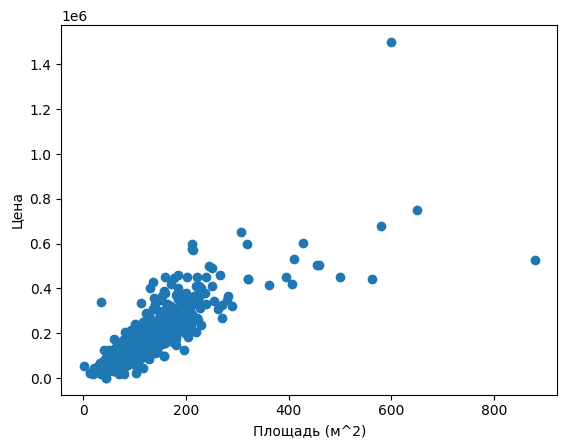

In [322]:
df.drop(index=2660, inplace=True)
plt.scatter(x='Площадь (м^2)', y='price_dollars', data = df)
plt.xlabel('Площадь (м^2)')
plt.ylabel('Цена')

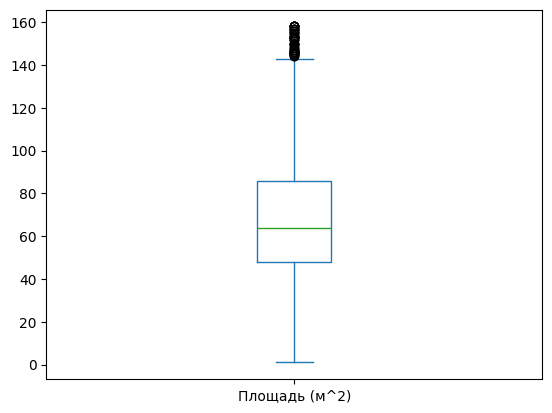

In [323]:
# Удалюя значения, выходящие за пределы 1.5 межквартильного размаха
Q1 = df['Площадь (м^2)'].quantile(0.25)
Q3 = df['Площадь (м^2)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR
outliers = df[(df['Площадь (м^2)'] < lower) | (df['Площадь (м^2)'] > upper)]
df.drop(outliers.index, inplace=True)


df['Площадь (м^2)'].plot(kind='box')
plt.show()

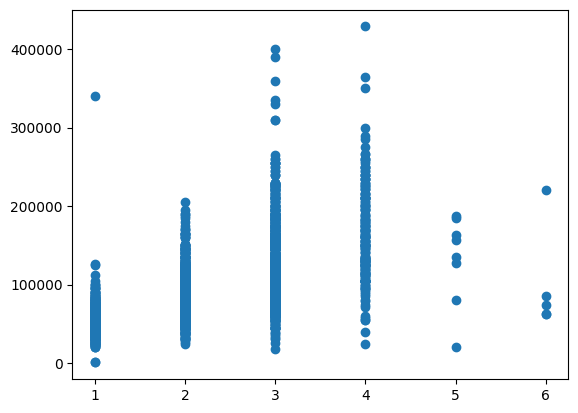

In [324]:
plt.scatter(x='Комнаты', y='price_dollars', data=df)

In [325]:
Q1 = df['price_dollars'].quantile(0.25)
Q3 = df['price_dollars'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR
outliers = df[(df['price_dollars'] < lower) | (df['price_dollars'] > upper)]
df.drop(outliers.index, inplace=True)

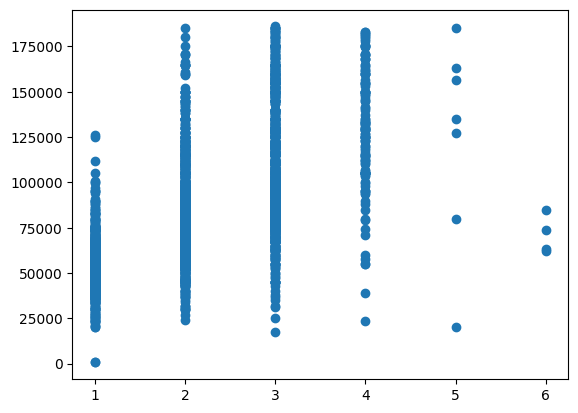

In [326]:
plt.scatter(x='Комнаты', y='price_dollars', data=df)

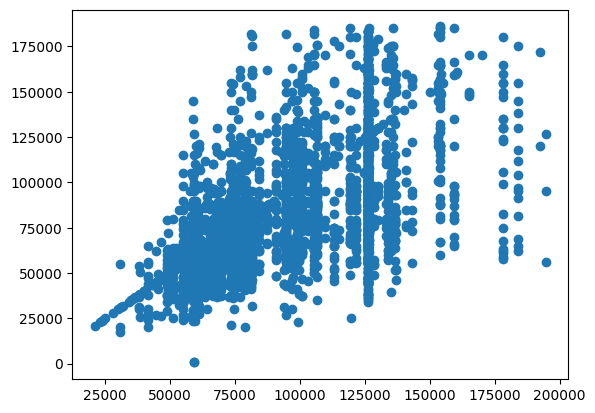

In [327]:
outliers = df[df['ср_стоим_адресс'] > 200000]
df.drop(outliers.index, inplace=True)

plt.scatter(x='ср_стоим_адресс', y='price_dollars', data=df)

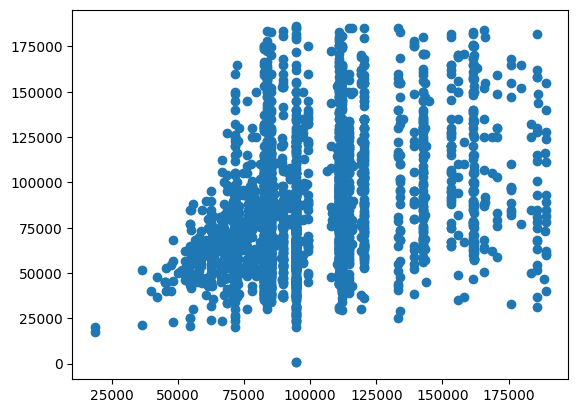

In [328]:
outliers = df[df['ср_стоим_Дом'] > 200000]
df.drop(outliers.index, inplace=True)
plt.scatter(x ='ср_стоим_Дом', y='price_dollars', data = df)

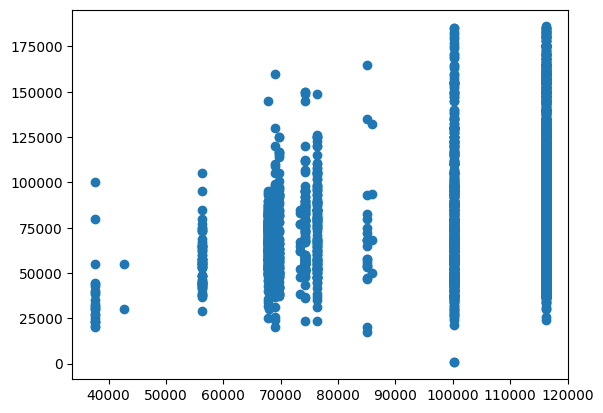

In [329]:
outliers = df[df['ср_стоим_серия'] > 200000]
df.drop(outliers.index, inplace=True)
plt.scatter(x ='ср_стоим_серия', y='price_dollars', data = df)


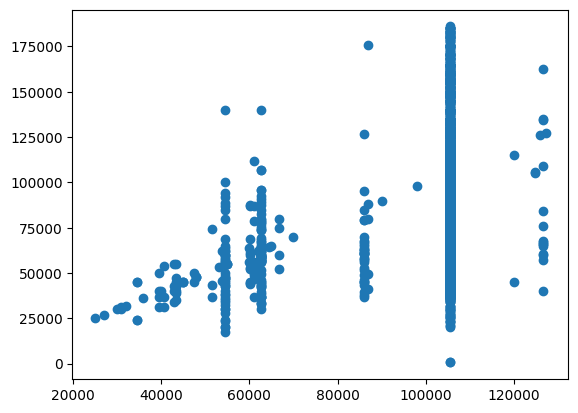

In [330]:
outliers = df[df['местность'] > 140000]
df.drop(outliers.index, inplace=True)
plt.scatter(x ='местность', y='price_dollars', data = df)


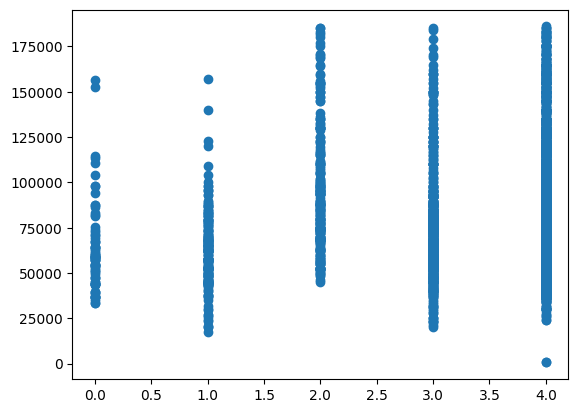

In [331]:
plt.scatter(x ='Состояние', y='price_dollars', data = df)

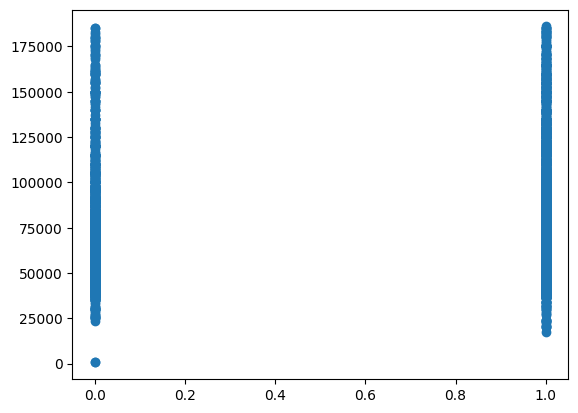

In [332]:
plt.scatter(x ='Тип предложения_от агента', y='price_dollars', data = df)
df.drop(columns='Тип предложения_от агента', inplace=True)
df_test.drop(columns='Тип предложения_от агента', inplace=True)

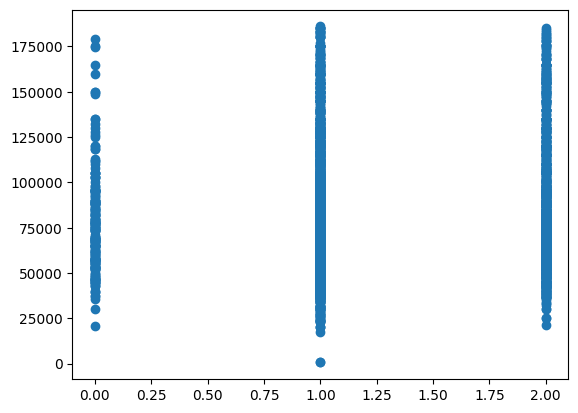

In [333]:
plt.scatter(x ='Безопасность', y='price_dollars', data = df)

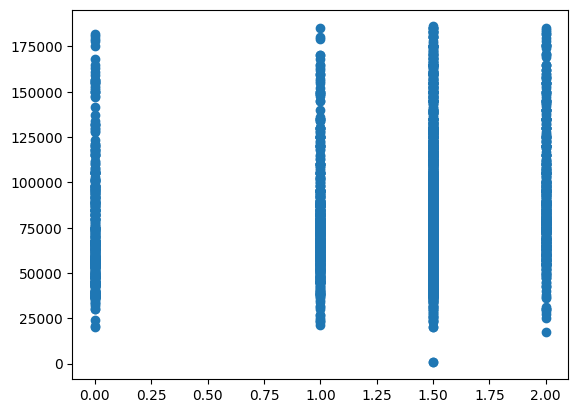

In [334]:
plt.scatter(x ='Мебель', y='price_dollars', data = df)

In [335]:
df.drop(columns=['Газ', 'Балкон', 'Возможность рассрочки', 'Парковка'], inplace=True)
df_test.drop(columns=['Газ', 'Балкон', 'Возможность рассрочки', 'Парковка'], inplace=True)

In [336]:
# Коррелляция данных по отношению к цене
y = df['price_dollars']
correlation = df.corrwith(y).sort_values(ascending=False)
print('Корреляция данных по отношению к цене')
correlation

Корреляция данных по отношению к цене


price_dollars                      1.000000
Площадь (м^2)                      0.820008
Комнаты                            0.634043
ср_стоим_адресс                    0.568260
ср_стоим_Дом                       0.371207
ср_стоим_серия                     0.303720
местность                          0.236428
Состояние                          0.174999
Мебель                             0.143999
Безопасность                       0.103679
Пол                                0.039128
Правоустанавливающие документы    -0.029454
Санузел                           -0.035830
Этажи/Всего этажей                -0.050384
Тип предложения_от собственника   -0.092909
dtype: float64

In [337]:
df['Тип предложения_от собственника'] = df['Тип предложения_от собственника'].astype(int)
df_test['Тип предложения_от собственника'] = df_test['Тип предложения_от собственника'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 3366
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_dollars                    2999 non-null   float64
 1   Состояние                        2999 non-null   int64  
 2   Санузел                          2999 non-null   int64  
 3   Правоустанавливающие документы   2999 non-null   int64  
 4   Мебель                           2999 non-null   float64
 5   Пол                              2999 non-null   int64  
 6   Безопасность                     2999 non-null   int64  
 7   Комнаты                          2999 non-null   int32  
 8   местность                        2999 non-null   float64
 9   ср_стоим_адресс                  2999 non-null   float64
 10  Тип предложения_от собственника  2999 non-null   int32  
 11  ср_стоим_серия                   2999 non-null   float64
 12  ср_стоим_Дом             

In [338]:
df

,price_dollars,Состояние,Санузел,Правоустанавливающие документы,Мебель,Пол,Безопасность,Комнаты,местность,ср_стоим_адресс,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,3,2,0,0.0,8,1,2,105598.971484,126094.258982,0,116193.784869,110778.078014,0.43,47
1,54000.0,3,2,1,1.5,0,1,2,105598.971484,81286.725000,0,84959.720000,94670.836879,1.00,42
2,122000.0,3,1,1,2.0,7,2,3,105598.971484,90776.666667,0,116193.784869,94670.836879,0.80,110
3,92000.0,4,0,1,2.0,8,2,2,105598.971484,126094.258982,1,116193.784869,82539.718367,0.25,68
4,69000.0,4,2,1,1.0,8,0,1,105598.971484,94780.000000,0,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,123000.0,4,3,1,1.0,8,1,4,105598.971484,79306.666667,1,100190.818653,83651.311111,0.29,104
3362,36000.0,4,0,0,1.5,0,1,1,36000.000000,36000.000000,1,100190.818653,85166.862661,0.67,25
3364,43000.0,3,0,1,1.5,0,1,2,43000.000000,54777.288136,0,100190.818653,94670.836879,0.50,54
3365,39000.0,4,0,0,1.5,0,1,1,105598.971484,59111.809091,0,69777.048193,85166.862661,0.25,27


In [339]:
df_test

,Состояние,Санузел,Правоустанавливающие документы,Мебель,Пол,Безопасность,Комнаты,местность,ср_стоим_адресс,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,4,0,1,1.5,0,1,2,105598.971484,61609.090909,0,116193.784869,112105.293173,0.67,87
1,4,0,0,1.5,0,1,1,105598.971484,57666.666667,0,116193.784869,120283.640351,1.00,36
2,4,0,1,1.0,0,1,1,105598.971484,59926.761905,0,116193.784869,114867.309859,0.78,33
3,4,2,1,1.0,8,2,1,105598.971484,100802.222222,1,116193.784869,112105.293173,0.78,48
4,4,0,0,1.5,0,1,2,105598.971484,126094.258982,0,116193.784869,82539.718367,0.25,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,3,3,1,2.0,5,2,5,105598.971484,291961.886792,0,116193.784869,188936.000000,0.56,229
994,4,3,1,0.0,0,1,2,105598.971484,126094.258982,0,116193.784869,83670.041322,0.20,84
995,2,0,0,1.5,0,1,3,105598.971484,126094.258982,0,100190.818653,120283.640351,0.25,105
996,4,2,1,1.0,8,0,3,105598.971484,100802.222222,0,100190.818653,59000.000000,1.00,55


Выделение целевой переменной и фитчей

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = df.loc[:, df.columns != 'price_dollars']
Y = df['price_dollars']
print(X.shape)
print(Y.shape)

(2999, 14)
(2999,)



Тренировочная выборка 70%
Тестовая выборка 30%
## Модель Random Forest - ансамблевовый метод (Bagging)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=14)
ranmodel = RandomForestRegressor()
ranmodel.fit(X_train, y_train)
y_pred = ranmodel.predict(X_test)
score_fores = ranmodel.score(X_test, y_test)
print('Оценка по метрике R^2', score_fores)

Оценка по метрике R^2 0.7878652193326278


In [342]:
importances = pd.Series(ranmodel.feature_importances_, index = X.columns).sort_values(ascending=False)
print('Данные которые имеют влияние на модельку Random Forest')
print(importances)

Данные которые имеют влияние на модельку Random Forest
Площадь (м^2)                      0.724036
ср_стоим_адресс                    0.116043
ср_стоим_Дом                       0.048855
Этажи/Всего этажей                 0.035827
Мебель                             0.011837
Пол                                0.010068
Комнаты                            0.009455
местность                          0.008599
Состояние                          0.007733
ср_стоим_серия                     0.007542
Санузел                            0.005411
Тип предложения_от собственника    0.005115
Безопасность                       0.004793
Правоустанавливающие документы     0.004684
dtype: float64


Визуализация данных которые по импакту обучение модели
Показывает какие данные насколько имеют влияние на предсказывание модельки

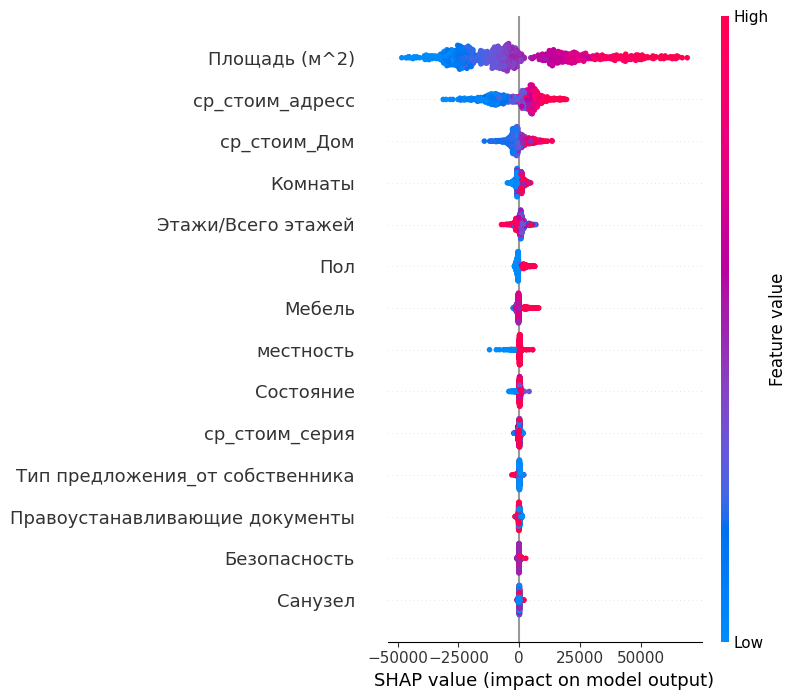

In [343]:
import shap

explainer = shap.TreeExplainer(ranmodel)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

## Xgboost - ансамблевовый метод (Boosting)

In [344]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = xgb_model.score(X_test, y_test)
print('Оценка по R^2', score_xgb)

Оценка по R^2 0.7888082488996975


In [345]:
columns = X_train.columns

## Стандартизация данных и применение линейной регрессии.

In [346]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_pred_r = regressor.predict(X_test)
print('Оценка модели метрика R^2', regressor.score(X_test, y_test))

Оценка модели метрика R^2 0.7529742571808307


Проверка на переобучилась ли модель
Если тренировачная выборка имеет очень маленькое различие между предсказанной и наоборот обучающая имеет большую разницу, то **Модель переобучилась**

In [347]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_pred_r)
print(f'Тренировачная выборка {train_error},\nТестовая выборка {test_error}')

Тренировачная выборка 261142617.70351037,
Тестовая выборка 265609616.80875617


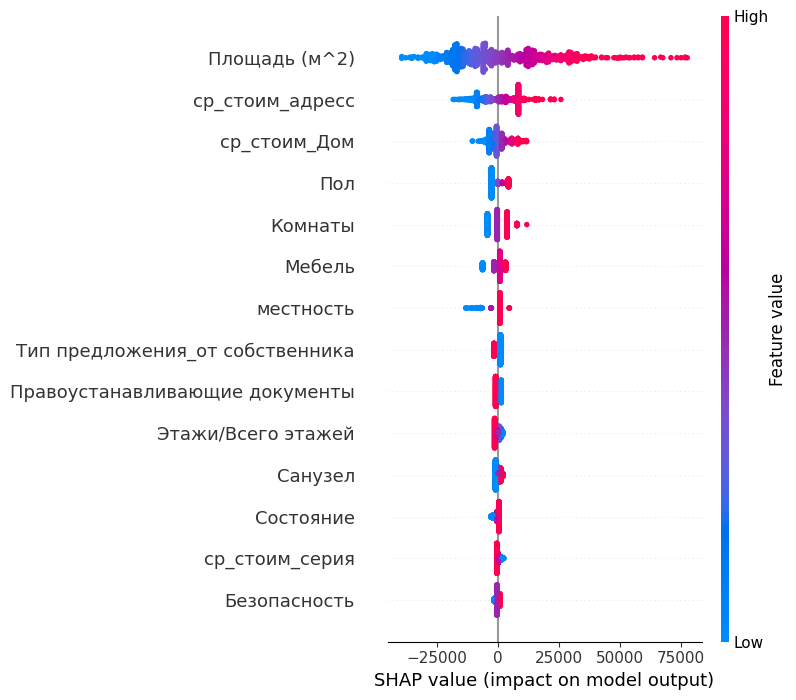

In [348]:
explainer = shap.LinearExplainer(regressor, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

### Оцениваю модель с кросс валидацией

In [349]:
cros_val = cross_val_score(regressor, X, Y, cv=5, scoring='r2')
print('Оценка линейной регрессии')
print('R^2 на каждом этапе:', cros_val)
print('Mean', np.mean(cros_val))

Оценка линейной регрессии
R^2 на каждом этапе: [0.78198922 0.76680693 0.78019438 0.77978013 0.76763621]
Mean 0.7752813757108339


In [350]:
cros_val_for = cross_val_score(ranmodel, X, Y, cv=5, scoring='r2')
print('Оценка random forest')
print('R^2 на каждом этапе:', cros_val_for)
print('Mean', np.mean(cros_val_for))

Оценка random forest
R^2 на каждом этапе: [0.8289035  0.79944613 0.8078029  0.82519063 0.80029549]
Mean 0.8123277296968666


In [351]:
cros_val_xgb = cross_val_score(xgb_model, X, Y, cv=5, scoring='r2')
print('Оценка xgboost')
print('R^2 на каждом этапе:', cros_val_for)
print('Mean', np.mean(cros_val_xgb))

Оценка xgboost
R^2 на каждом этапе: [0.8289035  0.79944613 0.8078029  0.82519063 0.80029549]
Mean 0.8091200519562282


In [352]:
target_y = ranmodel.predict(df_test)
target_y

array([ 85755.07      ,  44672.45      ,  44386.05      ,  76257.99      ,
       104241.99      ,  76784.66      ,  62703.        ,  83095.13      ,
        52963.        ,  48314.41      , 106980.4       ,  85713.9       ,
        55884.66      ,  77884.96      ,  82661.03      ,  97473.33      ,
       100686.42      , 112588.25      ,  50423.7       , 125536.        ,
       131262.07      , 154499.        ,  86117.        ,  55076.74      ,
       134399.72      ,  65731.79      , 102978.21      , 103055.4       ,
        94979.69      ,  69528.95      ,  52993.99      ,  44160.        ,
       119361.        ,  81485.72      ,  59045.6       ,  53601.        ,
        82856.47      ,  73469.96      ,  64783.37      ,  58756.59      ,
        83655.        , 135094.13666667, 103421.4       ,  67564.63      ,
        65860.92      , 114612.77      ,  46855.1       ,  41796.18      ,
       139743.32      ,  49437.        ,  58699.97      ,  37626.4       ,
       170215.29      ,  

In [354]:
target_y = target_y.astype(int)

In [355]:
output_csv = pd.DataFrame({'id': df_test.index, 'price_dollars': target_y})
output_csv

,id,price_dollars
0,0,85755
1,1,44672
2,2,44386
3,3,76257
4,4,104241
...,...,...
993,993,153572
994,994,116461
995,995,122604
996,996,76212


In [356]:
output_csv.to_csv('data/output.csv', index=False)